# Baseline Incentives Simulation - EDA

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import os
import plotly.express as px

## Single Run

In [2]:
file = sorted(f for f in os.listdir('../data/simulations') if 'single' in f)[-1]
data_path = f"../data/simulations/{file}"
raw_df = pd.read_pickle(data_path, compression='gzip')

dfs = [raw_df,
       raw_df.reward.map(lambda x: x.__dict__).apply(pd.Series),
       raw_df.network_power_scenario.map(lambda x: x.__dict__).apply(pd.Series)]

DROP_COLS = ['reward', 'network_power_scenario']

df = (pd.concat(dfs,
                axis=1)
      .drop(columns=DROP_COLS)
      #.dropna()
      .set_index('days_passed')
      .assign(block_reward=lambda x: x.simple_reward + x.baseline_reward)
      .assign(simple_reward=lambda x: x.simple_reward)
      .assign(baseline_reward=lambda x: x.baseline_reward)
      .assign(marginal_reward=lambda x: x.block_reward / x.network_power)
      )


In [3]:
id_vars = ['days_passed', 'subset', 'run']
variables = ['network_power', 'baseline', 'block_reward',
 'marginal_reward', 'simple_reward', 
 'baseline_reward', 'effective_network_time',
 'cumm_capped_power']
fig_df = df.reset_index().melt(id_vars=id_vars,
                               value_vars=variables)

fig = px.line(fig_df,
              x='days_passed',
              y='value',
              facet_col='run',
              facet_row='variable',
              height=800,
              log_y=True)
fig.update_yaxes(matches=None)
fig.show()


<AxesSubplot:>

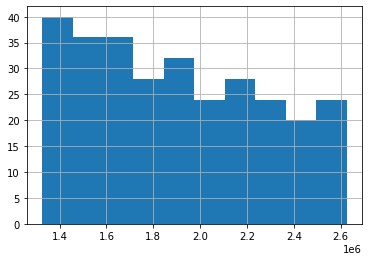

In [4]:
df.simple_reward.hist()

In [5]:
fig_df = df.reset_index()

fig = px.line(fig_df,
              x='days_passed',
              y=['network_power', 'baseline'],
              facet_col='run',
              log_y=True,
              height=400)
fig.show()


In [6]:
import pandas as pd
import os


file = sorted(os.listdir('../data/simulations'))[-1]
data_path = f"../data/simulations/{file}"
raw_df = pd.read_pickle(data_path, compression='gzip')

## Multi Run

In [7]:
file = sorted(f for f in os.listdir('../data/simulations') if 'multi' in f)[-1]
data_path = f"../data/simulations/{file}"
raw_df = pd.read_pickle(data_path, compression='gzip').reset_index()

In [8]:
raw_df.set.value_counts()

alternate_growth    296
baseline             74
Name: set, dtype: int64

In [9]:
fig_df = raw_df.reset_index()

fig = px.line(fig_df,
              x='days_passed',
              y=['network_power', 'baseline'],
              facet_col='run',
              facet_row='set',
              log_y=True,
              height=400)
fig.show()

In [10]:
df = raw_df.set_index(['set', 'run','timestep'])

In [11]:
set_1_df = df.loc['alternate_growth']
set_2_df = df.loc['baseline'].droplevel(0)

s  = (set_1_df.marginal_reward 
    / set_2_df.marginal_reward)
s.name = 'mining_utility'

set_1_df = set_1_df.assign(mining_utility=s)

In [12]:
fig_df = set_1_df.reset_index(drop=False).query('timestep > 1')

fig = px.line(fig_df,
              x='days_passed',
              y='mining_utility',
              color='run')
fig.show()

In [25]:
y_1 = set_1_df.query('run == 2').mining_utility.droplevel(0)
y_2 = set_1_df.query('run == 4').mining_utility.droplevel(0)
y = y_2 - y_1

fig_df =(set_1_df.reset_index(drop=False)
                 .query('timestep > 1')
                 .assign(relative_mining_utility=y))


fig = px.line(fig_df,
              x='days_passed',
              y='relative_mining_utility')
fig.show()

In [13]:
fig_df = set_1_df.reset_index(drop=False).query('timestep > 1')
fig = px.line(fig_df,
              x='days_passed',
              y=['simple_reward', 'baseline_reward'],
              facet_col='run')
fig.show()
